# Title

In [6]:
import pandas as pd

results_df = pd.read_pickle('data_COOH_CO_CHO.pkl')
results_df

,NP,adsorbate,atoms,energy,max_force,BE,MSiteCSymb_1
5,A,COOH,"(Atom('Cu', [12.25645, 10.02745, 11.44279], in...",-197.566433,0.009770,0.195935,Cu
8,A,COOH,"(Atom('Cu', [12.26858, 10.01252, 11.43148], in...",-197.647030,0.007501,0.115338,Cu
16,A,COOH,"(Atom('Cu', [12.27824, 9.99407, 11.42832], ind...",-197.523600,0.008645,0.238768,Cu
29,A,COOH,"(Atom('Cu', [12.24217, 10.04902, 11.42811], in...",-197.585795,0.009405,0.176573,Cu
75,A,COOH,"(Atom('Cu', [12.21321, 10.0102, 11.56747], ind...",-197.332135,0.008147,0.430233,Cu
...,...,...,...,...,...,...,...
1321,G,CO,"(Atom('Ag', [12.28087, 9.98184, 11.36073], ind...",-186.329619,0.009767,-0.709114,Pd
1323,G,CO,"(Atom('Ag', [12.24358, 9.969, 11.33586], index...",-186.386616,0.009650,-0.766111,Pd
1324,G,CO,"(Atom('Ag', [12.24707, 10.03047, 11.38592], in...",-186.823647,0.008628,-1.203142,Pt
1325,G,CO,"(Atom('Ag', [12.25903, 10.02402, 11.45003], in...",-186.885309,0.008859,-1.264804,Pt


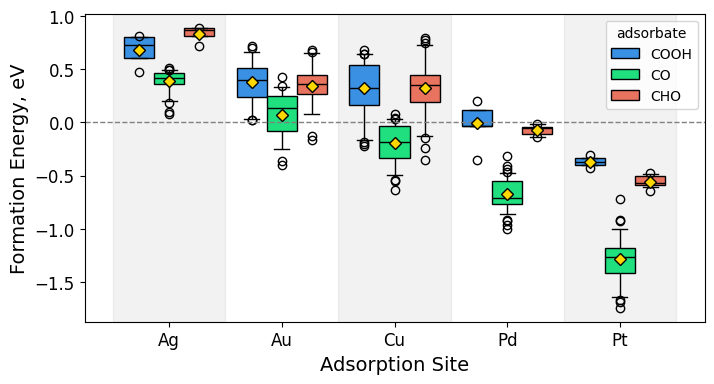

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8,4))
ax = sns.boxplot(x='MSiteCSymb_1', y='BE', data=results_df, hue='adsorbate', palette={'COOH': 'dodgerblue', 'CHO': 'tomato', 'CO': 'springgreen'},
                hue_order=['COOH', 'CO', 'CHO'], showmeans=True, whis=[5, 95],
                meanprops={"marker": "D", "markeredgecolor": "black", "markerfacecolor": "gold"},
                order=['Ag', 'Au', 'Cu', 'Pd', 'Pt'], linewidth=1., linecolor='black', ax=ax)
ax.set_ylabel('Formation Energy, eV', fontsize=14)
ax.set_xlabel('Adsorption Site', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add alternating shading using axvspan
# Note: the x positions for categorical data are integers (0, 1, 2, ...)
metal_sites = ['Ag', 'Au', 'Cu', 'Pd', 'Pt']
for i, site in enumerate(metal_sites):
    # Shade every other category (adjust alpha and color as desired)
    if i % 2 == 0:
        ax.axvspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.show()

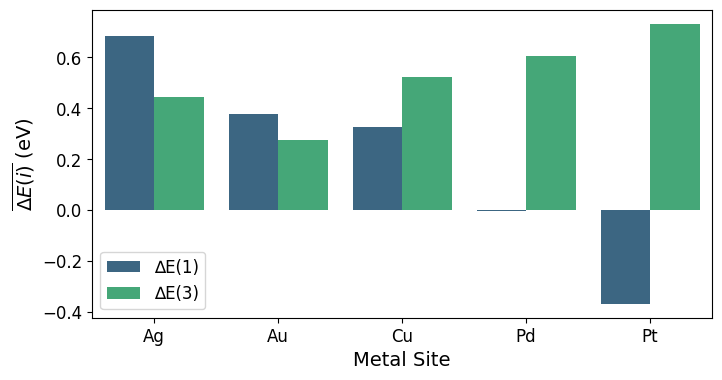

In [8]:
plotdata_grouped = (
    results_df
    .groupby(['adsorbate', 'MSiteCSymb_1'])
    .agg({'BE': ['min', 'max', 'mean', 'std', 'count']}) 
).reset_index()

plotdata_grouped.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in plotdata_grouped.columns]
delta_e_1 = plotdata_grouped.query('adsorbate == "COOH"')[['MSiteCSymb_1', 'BE_mean']].copy()
delta_e_1.columns = ['MSiteCSymb_1', '∆E(1)']
delta_e_2 = plotdata_grouped.query('adsorbate == "CO"')[['MSiteCSymb_1', 'BE_mean']].copy()
delta_e_2.columns = ['MSiteCSymb_1', 'BE_CO']
delta_e_3 = plotdata_grouped.query('adsorbate == "CHO"')[['MSiteCSymb_1', 'BE_mean']].copy()
delta_e_3.columns = ['MSiteCSymb_1', 'BE_CHO']
delta_e_2['∆E(2)'] = delta_e_2['BE_CO'] - plotdata_grouped.query('adsorbate == "COOH"')['BE_mean'].values
delta_e_3['∆E(3)'] = delta_e_3['BE_CHO'] - delta_e_2['BE_CO'].values


# Merge the two DataFrames on the metal site column
data_merged = delta_e_1[['MSiteCSymb_1', '∆E(1)']].merge(
    delta_e_3[['MSiteCSymb_1', '∆E(3)']], on='MSiteCSymb_1'
)

# Reshape the merged DataFrame from wide to long format
data_long = data_merged.melt(id_vars='MSiteCSymb_1', 
                             value_vars=['∆E(1)', '∆E(3)'],
                             var_name='Series', 
                             value_name='delta_E')

# Create the grouped bar plot using hue for the series
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='MSiteCSymb_1', y='delta_E', hue='Series', data=data_long, palette='viridis', ax=ax)
ax.set_xlabel('Metal Site', fontsize=14)
ax.set_ylabel(r'$\overline{\Delta E(i)}$ (eV)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(title=None, fontsize=12)
plt.show()